<a href="https://colab.research.google.com/github/aryanranderiya/AdvPython/blob/main/Accident_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import zipfile

# Define the path to the zip file
zip_path = r'/content/drive/MyDrive/Colab Notebooks/archive (2).zip'

# Define the extraction directory
extraction_path = r'/content/drive/MyDrive/Colab Notebooks/traffic_images/'

# Open and extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Extraction complete.")


Extraction complete.


In [3]:
from fastai.vision.all import *

In [10]:
from pathlib import Path

# Set path to your dataset
path = Path(r'/content/drive/MyDrive/Colab Notebooks/traffic_images/data')

# Define the transformations for data augmentation
train_transforms = aug_transforms(
    do_flip=True,
    flip_vert=True,
    max_rotate=20.0,
    max_zoom=1.1,
    max_lighting=0.2,
    max_warp=0.2,
    p_affine=0.75,
    p_lighting=0.75
)

# Prepare the data using ImageDataLoaders
dls = ImageDataLoaders.from_folder(
    path,
    train='train',  # folder containing training images
    valid='val',    # folder containing validation images
    test='test',    # folder containing test images
    valid_pct=0.2,  # Optional: split 80-20 for validation if you want to create a validation set
    item_tfms=Resize(224),  # Resizing all images to a uniform size
    batch_tfms=train_transforms,  # Apply augmentation
    label_func=parent_label,  # Use the folder names ('accident' or 'non-accident') as labels
    bs=32  # Batch size
)


In [11]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.001737800776027143)

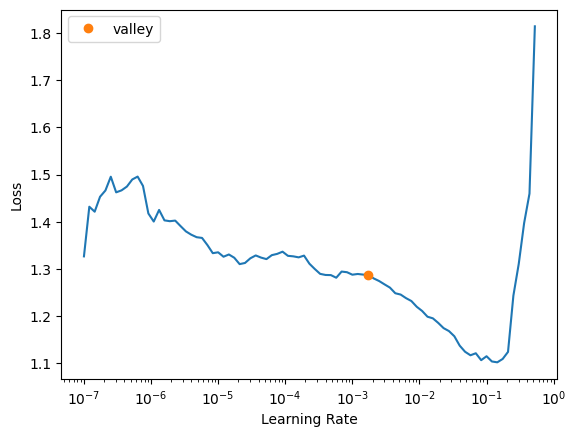

In [12]:
learn.lr_find()

In [13]:
learn.fine_tune(epochs=10)

epoch,train_loss,valid_loss,accuracy,time
0,1.243382,0.527495,0.767677,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.075735,0.529148,0.777778,00:08
1,1.038019,0.412730,0.797980,00:09
2,0.957712,0.373597,0.858586,00:10
3,0.874625,0.322158,0.909091,00:07
4,0.800990,0.316051,0.888889,00:10
5,0.735381,0.384287,0.848485,00:07
6,0.668062,0.282735,0.939394,00:11
7,0.630857,0.255411,0.939394,00:07
8,0.576485,0.256609,0.939394,00:11
9,0.538463,0.246538,0.949495,00:07


Prediction: Accident, Probability: 0.9996


<Axes: >

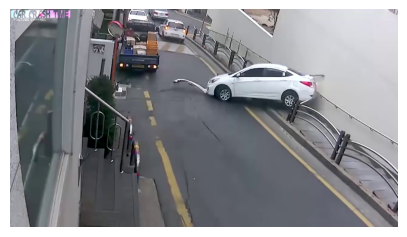

In [20]:
img_path = Path('/content/drive/MyDrive/Colab Notebooks/traffic_images/data/val/Accident/test10_22.jpg')
pred_class, pred_idx, outputs = learn.predict(img_path)
print(f"Prediction: {pred_class}, Probability: {outputs[pred_idx]:.4f}")
img = PILImage.create(img_path)
img.show()

Prediction: Non Accident, Probability: 0.5414


<Axes: >

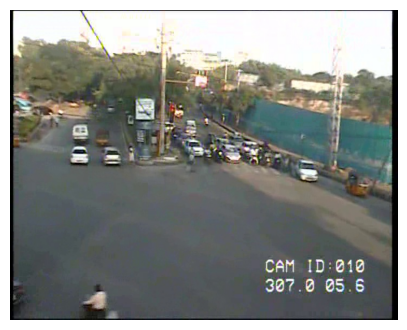

In [21]:
img_path = Path('/content/drive/MyDrive/Colab Notebooks/traffic_images/data/val/Non Accident/5_16.jpg')
pred_class, pred_idx, outputs = learn.predict(img_path)
print(f"Prediction: {pred_class}, Probability: {outputs[pred_idx]:.4f}")
img = PILImage.create(img_path)
img.show()

In [22]:
learn.export('/content/drive/MyDrive/Colab Notebooks/traffic_images/exported_model.pkl')

In [28]:
# Load the exported model
learn_inf = load_learner(r'/content/drive/MyDrive/Colab Notebooks/traffic_images/exported_model.pkl')

# Now you can use it for predictions
img_path = Path(r'/content/drive/MyDrive/Colab Notebooks/traffic_images/data/val/Accident/test10_22.jpg')
pred_class, pred_idx, outputs = learn_inf.predict(img_path)
print(f"Prediction: {pred_class}, Probability: {outputs[pred_idx]:.4f}")

Prediction: Accident, Probability: 0.9996


In [31]:
import time

# Measure the time taken to make a prediction
start_time = time.time()

# Run inference
img_path = Path(r'/content/drive/MyDrive/Colab Notebooks/traffic_images/data/val/Accident/test10_22.jpg')
pred_class, pred_idx, outputs = learn_inf.predict(img_path)

# Calculate the time taken
end_time = time.time()
inference_time = end_time - start_time
print(f"Inference Time: {inference_time:.4f} seconds")

# Optionally, display the result
print(f"Prediction: {pred_class}, Probability: {outputs[pred_idx]:.4f}")

Inference Time: 0.2339 seconds
Prediction: Accident, Probability: 0.9996
